In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [16]:
train_df.head()

,row_id,feature,target
0,0,2.981457,5.393127
1,1,4.073529,5.842601
2,2,9.272826,7.384454
3,3,0.705137,4.606203
4,4,7.241643,6.553693


In [17]:
train_df.describe()

,row_id,feature,target
count,1050.000000,1050.000000,1050.000000
mean,524.500000,4.987461,6.157472
std,303.253195,2.939351,0.923777
min,0.000000,0.027180,3.981782
25%,262.250000,2.468433,5.445083
50%,524.500000,4.895484,6.193906
75%,786.750000,7.477039,6.844589
max,1049.000000,9.972499,8.426969


In [18]:
train_df.shape

(1050, 3)

In [19]:
train_df["feature"].shape

(1050,)

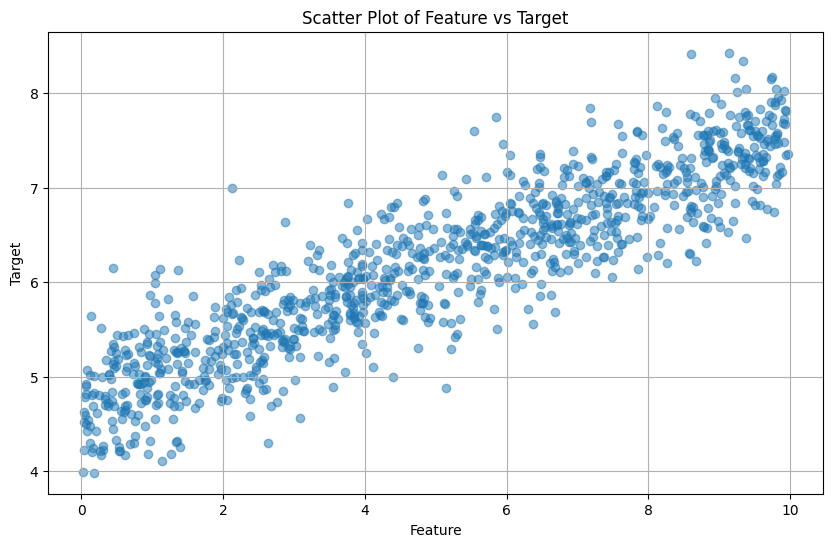

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df["feature"], train_df["target"], alpha=0.5)
plt.title('Scatter Plot of Feature vs Target')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.grid(True)
plt.show()

In [21]:
X = train_df["feature"].values
y = train_df["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [23]:
theta = np.random.randn(2, 1)  
learning_rate = 0.01
n_iterations = 1000

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

def mean_squared_error(X, y, theta):
    predictions = X.dot(theta)
    mse = np.mean((predictions - y) ** 2)
    return mse

In [26]:
theta = gradient_descent(X_train_b, y_train, theta, learning_rate, n_iterations)
mse_test = mean_squared_error(X_test_b, y_test, theta)
print("Mean Squared Error on the Test Set:", mse_test)

Mean Squared Error on the Test Set: 0.16282061580243307


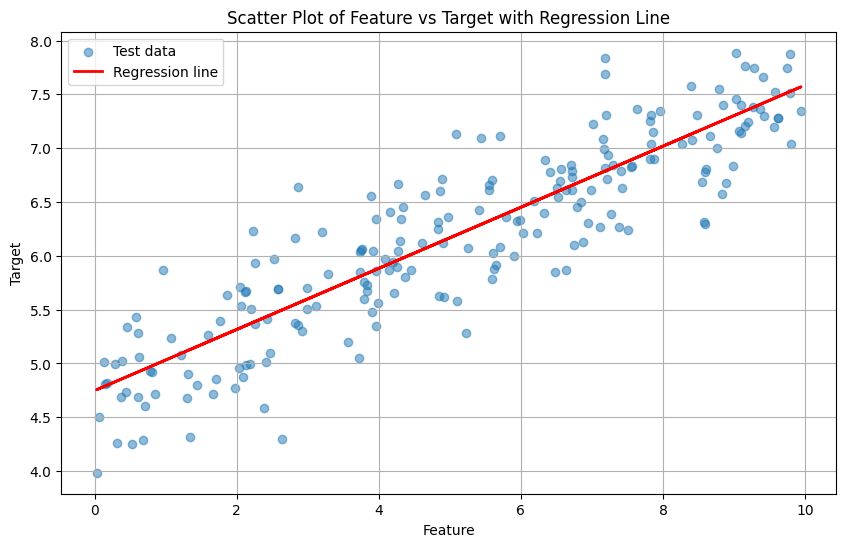

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label="Test data")
plt.plot(X_test, X_test_b.dot(theta), color='red', linewidth=2, label="Regression line")
plt.title('Scatter Plot of Feature vs Target with Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
test_df

,row_id,feature
0,0,1.160535
1,1,9.869024
2,2,5.611131
3,3,0.328108
4,4,8.794113
...,...,...
445,445,1.666243
446,446,6.718031
447,447,3.277955
448,448,0.420212


In [29]:
X_test_df = test_df["feature"].values.reshape(-1, 1)
X_test_df_b = np.c_[np.ones((X_test_df.shape[0], 1)), X_test_df]
predictions = X_test_df_b.dot(theta)
test_df["prediction"] = predictions
test_df

,row_id,feature,prediction
0,0,1.160535,5.077410
1,1,9.869024,7.549045
2,2,5.611131,6.340574
3,3,0.328108,4.841152
4,4,8.794113,7.243964
...,...,...,...
445,445,1.666243,5.220940
446,446,6.718031,6.654733
447,447,3.277955,5.678374
448,448,0.420212,4.867292


In [30]:
test_df = test_df.drop(columns=["feature"])
csv_file_path = "predictions.csv"
test_df.to_csv(csv_file_path, index=False)